In [17]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt

### Задание 1.

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса. 

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

H0: Уровень стресса значимо не отличается от среднего

H1: (Двусторонняя альтернативная гипотиза) Уровень стреса отличается в меньшую или большую сторону

In [9]:
sts.binom_test(67, 100, p=0.75, alternative='two-sided').round(4)

0.0822

### Задание 3.

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [15]:
data_sosni = pd.read_csv('pines.txt', sep='\t')

In [16]:
data_sosni

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4
...,...,...
579,169.1,160.0
580,162.5,157.3
581,156.7,155.3
582,154.1,150.8


In [30]:
hist, x, y = np.histogram2d(data_sosni.sn, data_sosni.we)

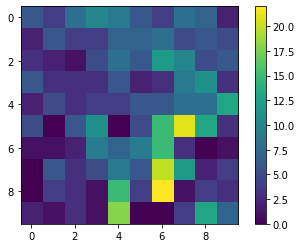

In [29]:
plt.imshow(hist)
plt.colorbar()

In [37]:
res = sts.binned_statistic_2d(data_sosni.sn, data_sosni.we, None, 'count', bins=5)

In [40]:
count_sosni = res.statistic
count_sosni

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [48]:
count_sosni.mean()

23.36

### Задание 4.

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [70]:
chi = sts.chisquare(count_sosni.flatten(), ddof=0)
chi

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

In [64]:
chi.statistic.round(2)

150.59

### Задание 5.

Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно? 

Нулевое распределение статистики — хи-квадрат с 25-1=24 степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы K-1, где K — количество интервалов).

Посчитайте достигаемый уровень значимости.  

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare  — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

In [72]:
sts.chisquare(count_sosni.flatten(), ddof=0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)